In [1]:
import torch
import numpy as np
from experiments.utils import pickle_read
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from torchvision.utils import make_grid

from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.progress import ProgressBar
import pytorch_lightning as pl
from neuralpredictors.measures.modules import Corr, PoissonLoss
from torch.nn import Parameter
from energy_model.lucas_gabor_filter import GaborFilter
from energy_model.utils import plot_f, create_grating

/auto/budejovice1/mpicek/reCNN_visual_prosthesis/energy_model/utils.py:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if wave is "sin":
/auto/budejovice1/mpicek/reCNN_visual_prosthesis/energy_model/utils.py:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif wave is "sqr":


# Create grating and gabor filters and visualize them

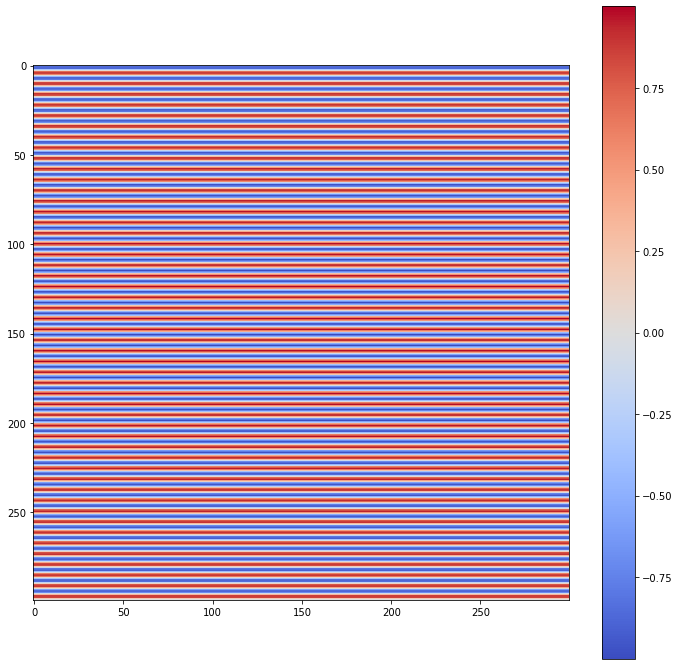

In [2]:
g = create_grating(sf=1/0.4, ori=0, phase=0, wave='sin', res=[300, 300],
    xlim=[-10, 10],
    ylim=[-10, 10])
plot_f(g)

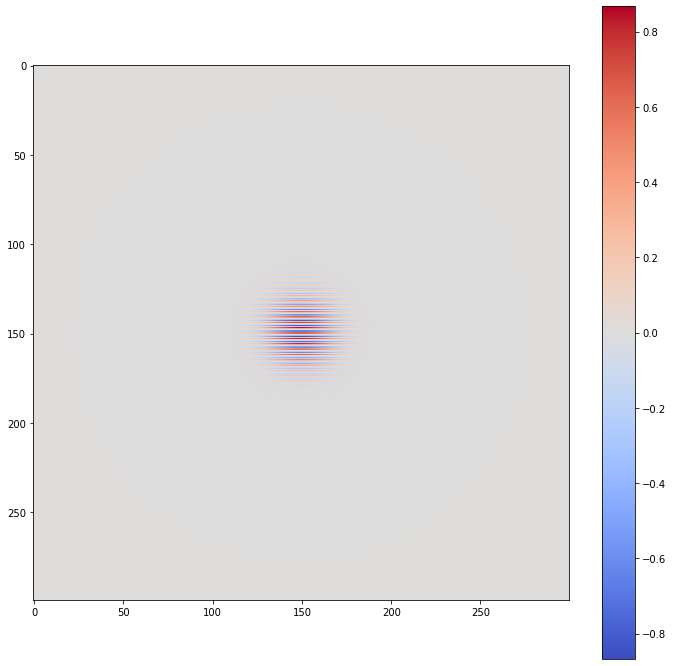

In [3]:
# These gabor filters are deprecated, we don't use them anywhere.
# It only justifies that the first version was correctly implemented.

x = GaborFilter(
    pos=[0, 0],
    sigma_x=1,
    sigma_y=1,
    sf=5,
    theta=np.pi/2,
    phase=np.pi/2,
    res=[300, 300],
    xlim=[-10, 10],
    ylim=[-10, 10],

)

y = GaborFilter(
    pos=[0, 0],
    sigma_x=1,
    sigma_y=1,
    sf=5,
    theta=np.pi/2,
    phase=0,
    res=[300, 300],
    xlim=[-10, 10],
    ylim=[-10, 10],
)


plot_f(x)

### Now we present the grating that is gradually shifted. As we can see on the graph, the final response of the energy model is constant.

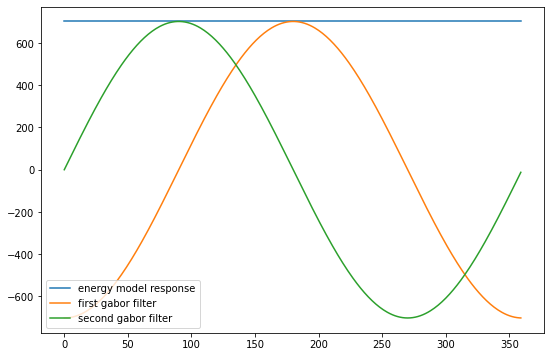

In [4]:
responses = []
x_responses = []
y_responses = []
for i in range(360):
    g = create_grating(sf=5, ori=0, phase=i, wave='sin', res=[300, 300],
        xlim=[-10, 10],
        ylim=[-10, 10])
    x_res = np.tensordot(x, g)
    y_res = np.tensordot(y, g)
    responses.append(np.sqrt(x_res**2 + y_res**2))
    x_responses.append(np.tensordot(x, g))
    y_responses.append(np.tensordot(y, g))
responses = np.array(responses)
plt.clf()
plt.gcf().set_size_inches(9, 6)
plt.plot(responses, label="energy model response")
plt.plot(x_responses, label="first gabor filter")
plt.plot(y_responses, label="second gabor filter")
plt.legend(loc="lower left")

# Now let's download and visualize an energy model

In [5]:
from create_ensemble import download_energy_model 
import wandb
ENTITY = "csng-cuni"
PROJECT = "reCNN_visual_prosthesis"
config = {}


run = wandb.init(
    config=config,
    project=PROJECT,
    entity=ENTITY,
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: csng-cuni (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.13.5 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: Downloading large artifact model-2rxfiy4e:v0, 266.38MB. 1 files... Done. 0:0:0


./artifacts/model-2rxfiy4e:v0
./artifacts/model-2rxfiy4e:v0/model.ckpt


/opt/conda/lib/python3.8/site-packages/neuralpredictors/measures/modules.py:78: UserWarning: Poissonloss is averaged per batch. It's recommended to use `sum` instead
  warnings.warn("Poissonloss is averaged per batch. It's recommended to use `sum` instead")


Model from ./artifacts/model-2rxfiy4e:v0/model.ckpt loaded!


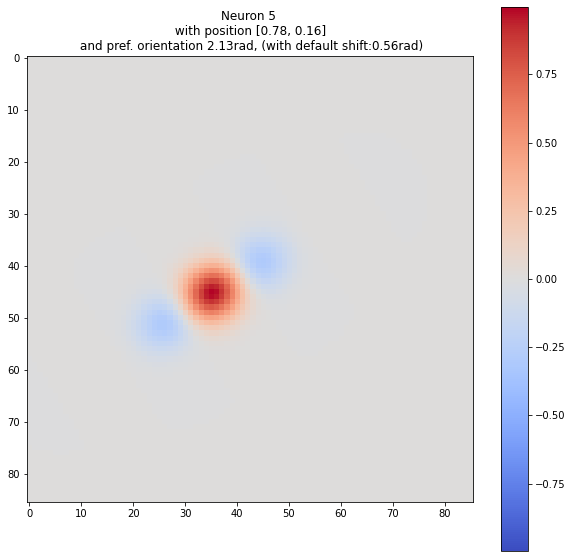

In [6]:
model_name_prefix="csng-cuni/reCNN_visual_prosthesis/model-"
task = "2rxfiy4e"

model = download_energy_model(model_name_prefix + task + ":v0", run)
model.visualize(5, True, init=True)